In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd 
import random
import statistics
import seaborn as sns 
import collections
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

$X = \frac{U_1/d_1}{U_2/d_2}$

$U_1$ and $U_2$ have chi-squared distribution with $d_1$ and $d_2$ degrees of freedom respectively. And $U_1$ and $U_2$ are independent.

So, to put simply, F-distribution is made up of Chi-Sqaured Distribution. In order to understand F-distribution, I will have to compare Chi-Squared distribution with F-Distribution. 

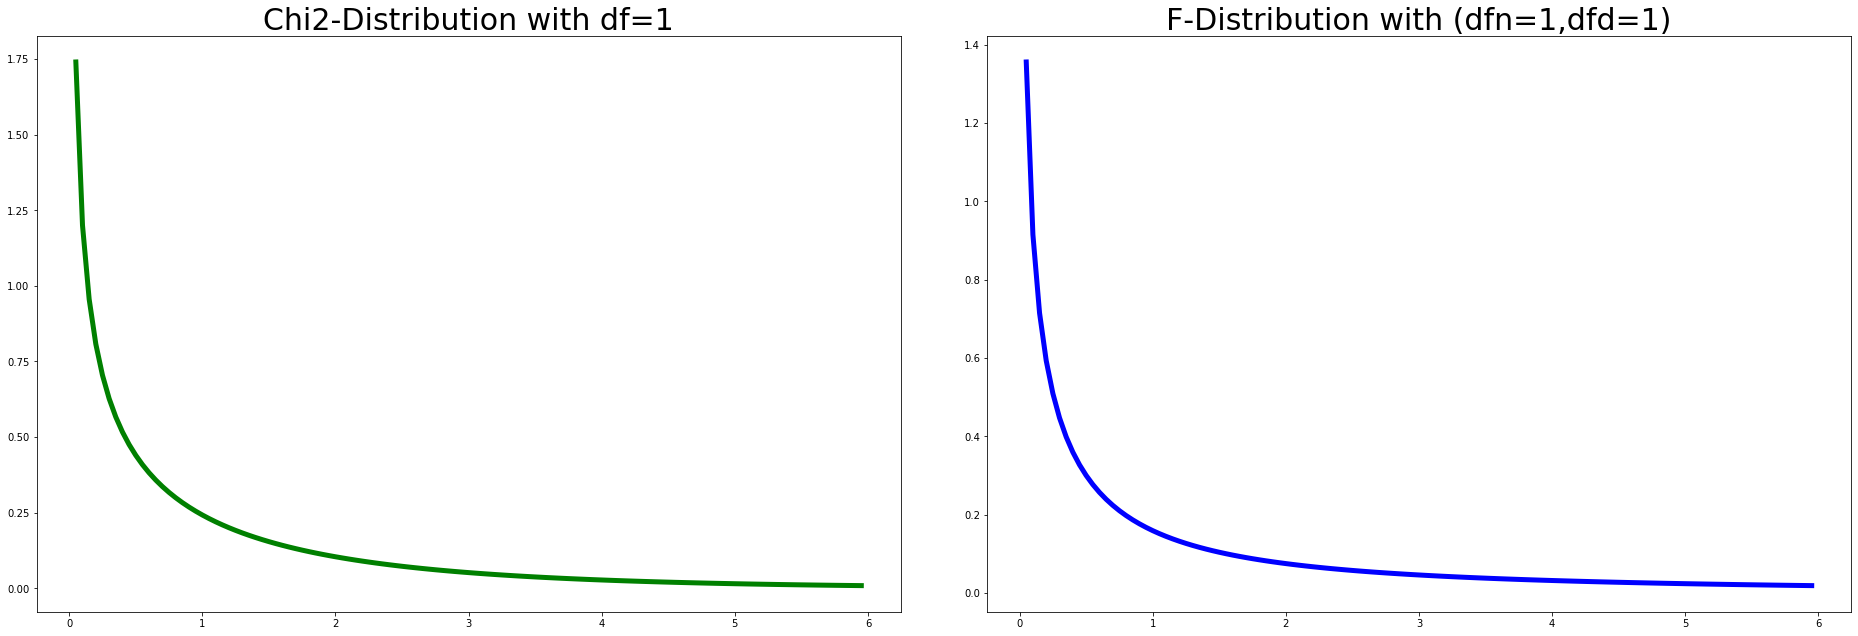

In [64]:
fig = plt.figure(figsize=(12,8))

ax_0 = fig.add_axes([0,0,1,1])
ax_1 = fig.add_axes([1.1,0,1,1])

x = np.arange(0, 6, 0.05)

ax_0.plot(x, stats.chi2.pdf(x, 1), color="green", lw=5)
ax_0.set_title("Chi2-Distribution with df=1", fontsize=30)

ax_1.plot(x, stats.f.pdf(x, 1, 1), color="blue", lw=5)
ax_1.set_title("F-Distribution with (dfn=1,dfd=1)", fontsize=30)

plt.show()

Let's look at the graphs above. The one on the left is pdf of Chi2 distribution and the one on the right is pdf of F-distribution. And it's hard to compare like this. So let me put these two on a same conrdinate. 

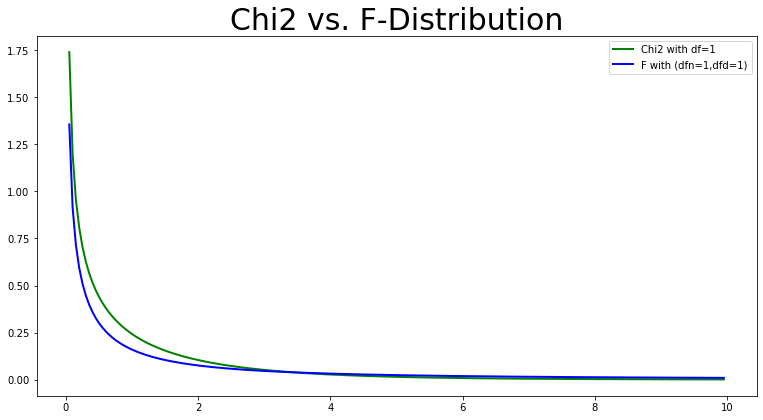

In [73]:
fig = plt.figure(figsize=(10,5))
ax_1 = fig.add_axes([0,0,1,1])

x = np.arange(0, 10, .05)
ax_1.plot(x, stats.chi2.pdf(x, 1), color="green", lw=2, label="Chi2 with df=1")
ax_1.plot(x, stats.f.pdf(x, 1, 1), color="blue", lw=2, label="F with (dfn=1,dfd=1)")

ax_1.set_title("Chi2 vs. F-Distribution", fontsize=30)

plt.legend()
plt.show()

Well, it is very hard to explain. For 1 degree of freedom, Chi2 and F looks almost the same. So it is hard to explain intuitively on this one. 

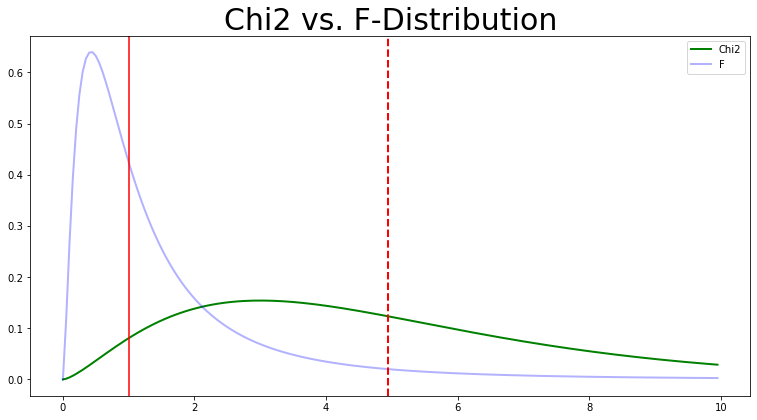

In [97]:
fig = plt.figure(figsize=(10,5))
ax_1 = fig.add_axes([0,0,1,1])

x = np.arange(0, 10, .05)
ax_1.plot(x, stats.chi2.pdf(x, 5), color="green", lw=2, label="Chi2")
ax_1.plot(x, stats.f.pdf(x, 5, 5), color="blue", alpha=0.3, lw=2, label="F")
ax_1.axvline(np.mean(stats.chi2.rvs(5,size=1000)), color="red", linestyle="--", linewidth=2)
ax_1.axvline(1, color="red")

ax_1.set_title("Chi2 vs. F-Distribution", fontsize=30)

plt.legend()
plt.show()

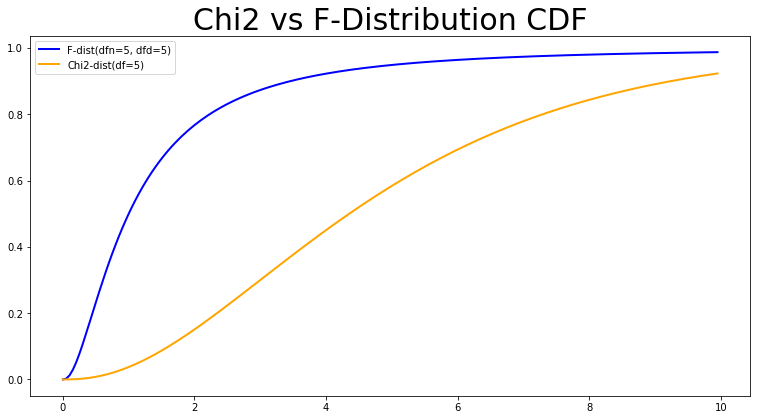

In [118]:
fig = plt.figure(figsize=(10,5))
ax_1 = fig.add_axes([0,0,1,1])

x = np.arange(0, 10, .05)
ax_1.plot(x, stats.f.cdf(x, 5, 5), color='blue', lw=2, label="F-dist(dfn=5, dfd=5)")
ax_1.plot(x, stats.chi2.cdf(x, 5), color='orange', lw=2, label="Chi2-dist(df=5)")

ax_1.set_title("Chi2 vs F-Distribution CDF", fontsize=30)

plt.legend()
plt.show()

But let me try it with df = 5. But this is still hard to explain. Let's say there is 2 from Chi2 distribution. There is a higher probability that this 2 will get divided by a bigger number from another Chi2 distribution. And this logic continues up to a certain point. 

Same thing with number 1. There is a higher probability that this 1 will get divided by another number that is bigger than 1. Therefore, F distrubtion has the most frequency ranging from 0 to 2. 

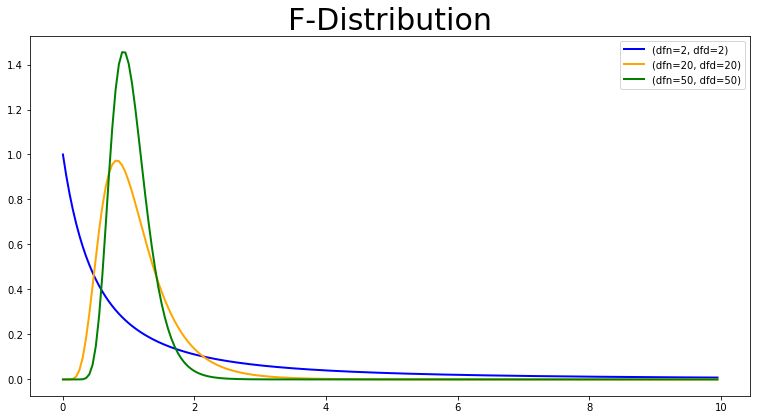

In [100]:
fig = plt.figure(figsize=(10,5))
ax_1 = fig.add_axes([0,0,1,1])

x = np.arange(0, 10, .05)
ax_1.plot(x, stats.f.pdf(x, 2, 2), color='blue', lw=2, label="(dfn=2, dfd=2)")
ax_1.plot(x, stats.f.pdf(x, 20, 20), color='orange', lw=2, label="(dfn=20, dfd=20)")
ax_1.plot(x, stats.f.pdf(x, 50, 50), color='green', lw=2, label="(dfn=50, dfd=50)")

ax_1.set_title("F-Distribution", fontsize=30)

plt.legend()
plt.show()

In [101]:
?stats.f.cdf

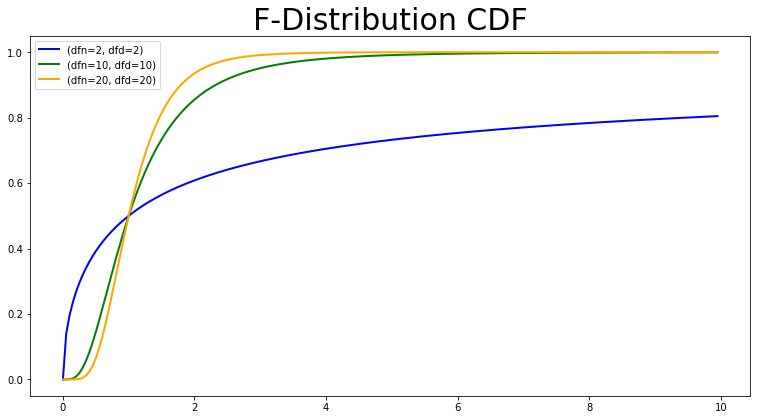

In [114]:
fig = plt.figure(figsize=(10,5))
ax_1 = fig.add_axes([0,0,1,1])

x = np.arange(0, 10, .05)
ax_1.plot(x, stats.f.cdf(x, 1, 1), color='blue', lw=2, label="(dfn=2, dfd=2)")
ax_1.plot(x, stats.f.cdf(x, 10, 10), color='green', lw=2, label="(dfn=10, dfd=10)")
ax_1.plot(x, stats.f.cdf(x, 20, 20), color='orange', lw=2, label="(dfn=20, dfd=20)")



ax_1.set_title("F-Distribution CDF", fontsize=30)

plt.legend()
plt.show()

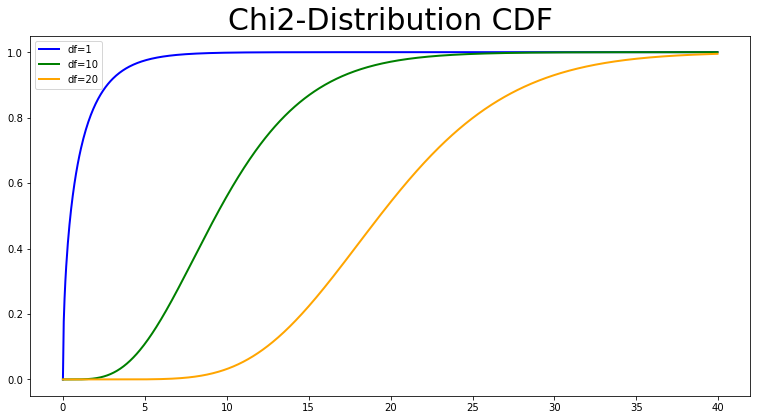

In [110]:
fig = plt.figure(figsize=(10,5))
ax_1 = fig.add_axes([0,0,1,1])

x = np.arange(0, 40, .05)
ax_1.plot(x, stats.chi2.cdf(x, 1), color='blue', lw=2, label="df=1")
ax_1.plot(x, stats.chi2.cdf(x, 10), color='green', lw=2, label="df=10")
ax_1.plot(x, stats.chi2.cdf(x, 20), color='orange', lw=2, label="df=20")



ax_1.set_title("Chi2-Distribution CDF", fontsize=30)

plt.legend()
plt.show()

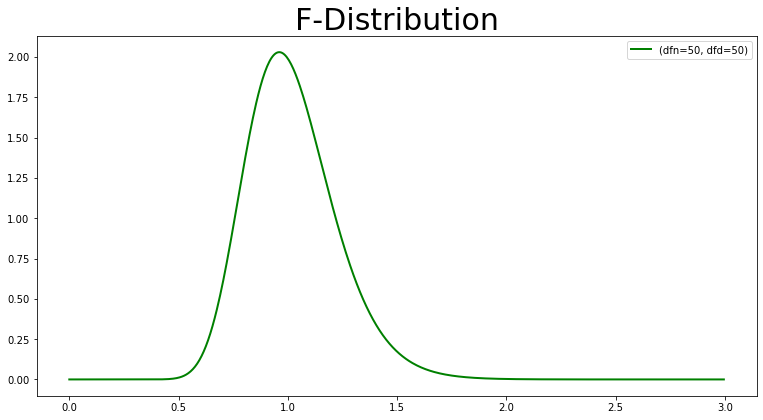

In [122]:
fig = plt.figure(figsize=(10,5))
ax_1 = fig.add_axes([0,0,1,1])

x = np.arange(0, 3, .005)
ax_1.plot(x, stats.f.pdf(x, 100, 100), color='green', lw=2, label="(dfn=50, dfd=50)")

ax_1.set_title("F-Distribution", fontsize=30)

plt.legend()
plt.show()

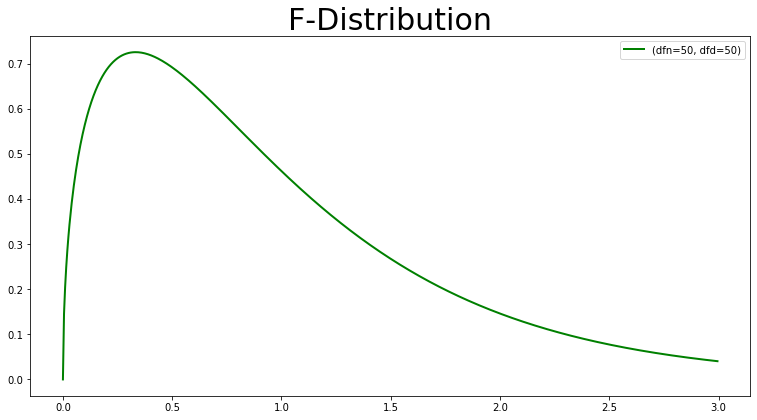

In [134]:
fig = plt.figure(figsize=(10,5))
ax_1 = fig.add_axes([0,0,1,1])

x = np.arange(0, 3, .005)
ax_1.plot(x, stats.f.pdf(x, 3, 1000), color='green', lw=2, label="(dfn=50, dfd=50)")

ax_1.set_title("F-Distribution", fontsize=30)

plt.legend()
plt.show()

In [126]:
np.square(np.random.normal(0,1,size=100))

array([3.10524846e-02, 1.29439501e-02, 1.12967595e+00, 4.31298425e-01,
       2.40100671e+00, 2.87514789e-01, 1.07615039e-01, 1.11575490e-01,
       3.08782859e-02, 1.04380430e-02, 3.14413047e-02, 3.40525277e-02,
       1.46586067e-01, 4.72927196e-01, 1.03296477e-01, 1.68238045e-01,
       1.96312927e-02, 1.47013319e-01, 1.10722248e-01, 1.11253227e-03,
       5.30766946e-01, 1.50611769e+00, 2.27797166e+00, 1.03450506e-03,
       1.80368752e-01, 2.02886809e+00, 9.85865984e-01, 3.14898112e-01,
       4.59147764e-01, 4.71029285e+00, 3.61760259e-01, 4.20353873e-01,
       6.26028821e-01, 3.65867304e-01, 5.22888515e-02, 2.46464840e+00,
       1.49254694e-01, 6.79526898e-01, 6.17732881e-02, 3.11184116e+00,
       4.49676411e-04, 3.42949838e-03, 7.96270246e-01, 2.18698243e-01,
       1.76899100e+00, 1.68772459e-01, 2.34613605e-01, 4.57898194e-02,
       6.04931355e-01, 2.56235830e-01, 1.24898085e-02, 4.52191226e-02,
       1.22632788e-01, 1.28244999e-01, 1.86959229e-03, 8.79240285e-02,
      

### F-test is originally to test if the two populations has same size of variance or not. 

In [166]:
np.random.seed(1)

## I have generated two sets of population with same varaince. 
pop_size = 10000
sample_size = 100
pop_1 = np.random.normal(0, 1, size=pop_size)
pop_2 = np.random.normal(0, 1, size=pop_size)

## Now, I am taking a sample with a size of 100 from each population. 
inx_1 = np.random.randint(pop_size, size=sample_size)
inx_2 = np.random.randint(pop_size, size=sample_size)

sample_1 = pop_1[inx_1]
sample_2 = pop_2[inx_2]

## Now, I compute the sample variance for each sample. 
var_sample_1 = statistics.variance(sample_1)
var_sample_2 = statistics.variance(sample_2)



In [167]:
(var_sample_1/100)/(var_sample_2/100)

1.2219819780830063

In [169]:
var_sample_2

0.7469853597083662

In [168]:
var_sample_1

0.9128026474554755

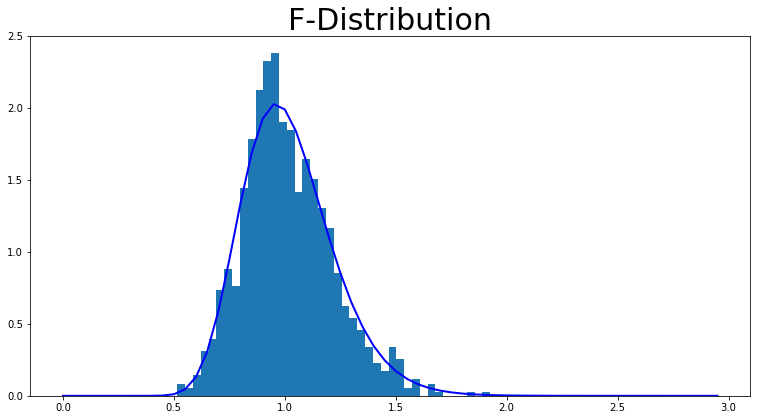

In [185]:
fig = plt.figure(figsize=(10,5))
ax_1 = fig.add_axes([0,0,1,1])

x = np.arange(0, 3, .05)
ax_1.plot(x, stats.f.pdf(x, 100, 100), color='blue', lw=2)
ax_1.hist(stats.f.rvs(100,100, size=1000),bins=40, density=True)

ax_1.set_title("F-Distribution", fontsize=30)

plt.show()

In [ ]:
np.random.seed(1)

## I have generated two sets of population with same varaince. 
pop_size = 10000
sample_size = 100
pop_1 = np.random.normal(0, 1, size=pop_size)
pop_2 = np.random.normal(0, 1, size=pop_size)

## Now, I am taking a sample with a size of 100 from each population. 
inx_1 = np.random.randint(pop_size, size=sample_size)
inx_2 = np.random.randint(pop_size, size=sample_size)

sample_1 = pop_1[inx_1]
sample_2 = pop_2[inx_2]

## Now, I compute the sample variance for each sample. 
var_sample_1 = statistics.variance(sample_1)
var_sample_2 = statistics.variance(sample_2)



In [189]:
np.random.seed(1)

pop_size = 10000
sample_size = 100
pop_1 = np.random.normal(0, 1, size=pop_size)
pop_2 = np.random.normal(0, 1, size=pop_size)

var_sample_1_list = [] 
var_sample_2_list = []

for i in range(10000):
    inx_1 = np.random.randint(pop_size, size=sample_size)
    inx_2 = np.random.randint(pop_size, size=sample_size)
    
    sample_1 = pop_1[inx_1]
    sample_2 = pop_2[inx_2]
    
    var_sample_1 = statistics.variance(sample_1) 
    var_sample_2 = statistics.variance(sample_2)
    
    var_sample_1_list.append(var_sample_1)
    var_sample_2_list.append(var_sample_2)

In [194]:
statistics.pvariance(var_sample_1_list)

0.020243828445109174

In [ ]:
np.random.normal

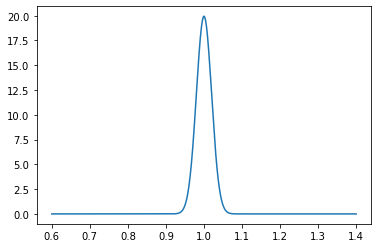

In [209]:
x = np.arange(0.6, 1.4, .00005)
plt.plot(x, stats.norm(1,0.02).pdf(x))

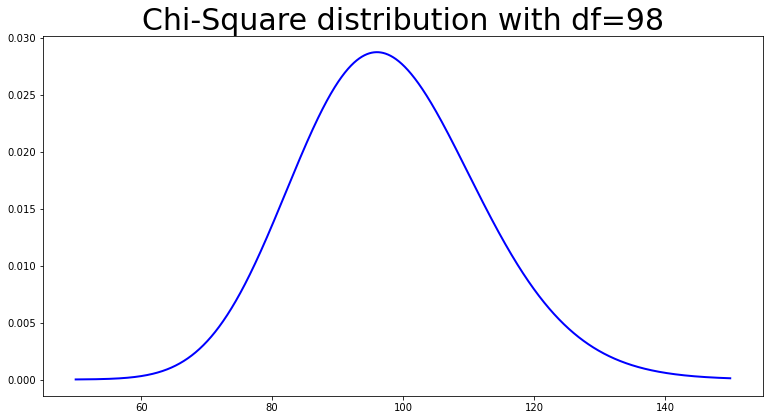

In [212]:
fig = plt.figure(figsize=(10,5))
ax_1 = fig.add_axes([0,0,1,1])
x = np.arange(50, 150, .05)
ax_1.plot(x, stats.chi2.pdf(x, df=98), color='blue', lw=2)

ax_1.set_title("Chi-Square distribution with df=98", fontsize=30)
plt.show()

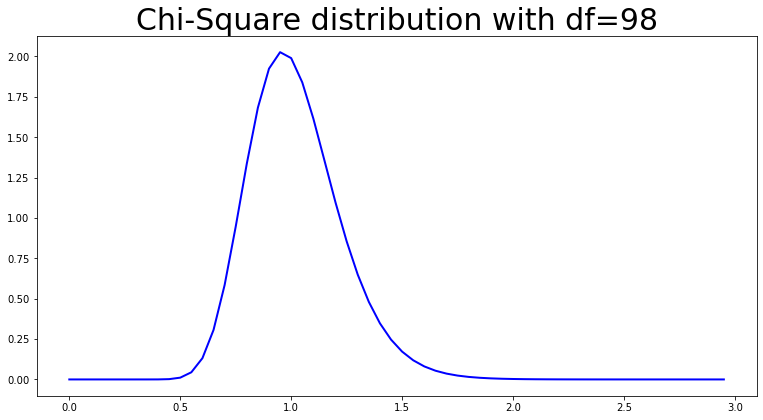

In [214]:
fig = plt.figure(figsize=(10,5))
ax_1 = fig.add_axes([0,0,1,1])
x = np.arange(0, 3, .05)
ax_1.plot(x, stats.f.pdf(x,100,100), color='blue', lw=2)

ax_1.set_title("Chi-Square distribution with df=98", fontsize=30)
plt.show()

In [237]:
std = np.sqrt(statistics.pvariance(var_sample_1_list))
std

0.14228080842161803

In [239]:
mean = statistics.mean(var_sample_1_list)
mean

0.997210394166608

In [235]:
?stats.norm

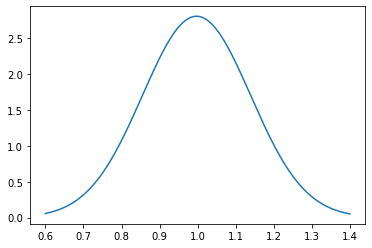

In [240]:
x = np.arange(0.6, 1.4, .00005)
plt.plot(x, stats.norm(mean,std).pdf(x))

In [246]:
?stats.chi2.pdf

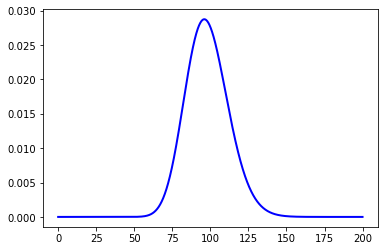

In [259]:
plt.plot(x, stats.chi2.pdf(x, df=98), color='blue', lw=2)

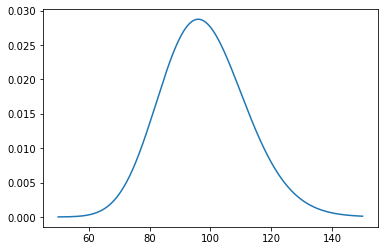

In [265]:
x = np.arange(50, 150, .05)
plt.plot(x, stats.chi2.pdf(x, df=98))

In [268]:
mean

0.997210394166608

In [288]:
mean_1 = statistics.mean(stats.chi2.rvs(98,size=10000))
mean_1

97.80781212504

In [293]:
std_1 = statistics.pstdev(stats.chi2.rvs(98,size=10000))
std_1

14.131667134231572

In [ ]:
stats.chi2.rvs

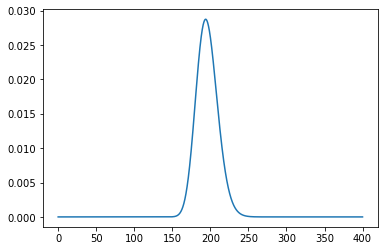

In [308]:
x = np.arange(0, 400, .05)
plt.plot(x, stats.chi2.pdf(x,df=98, loc=mean_1))

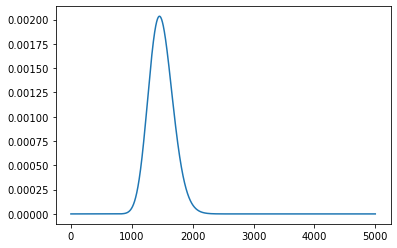

In [297]:
x = np.arange(0, 5000, .05)
plt.plot(x, stats.chi2.pdf(x,df=98, loc=mean_1, scale=std_1))

In [ ]:
x = np.arange(0, 3, .05)

plt.hist(var_sample_1_list, bins=50, density=True)
plt.plot(x, stats.norm(mean,std).pdf(x))
plt.show()

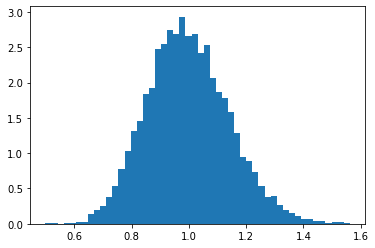

In [312]:
plt.hist(var_sample_1_list, bins=50, density=True)
plt.show()

In [318]:
np.dot(var_sample_1_list, 99)

array([ 90.3674621 , 108.64862906, 102.83727427, ...,  98.62259189,
       113.14804324, 103.98751651])

In [313]:
var_sample_1_list

[0.9128026474554755,
 1.097460899564205,
 1.038760346199902,
 0.828009112028886,
 1.0053255529621234,
 1.0810392222587633,
 0.9572522338431217,
 0.9526956975181133,
 1.1775509146640242,
 0.9859598835508427,
 1.0848423748014662,
 0.8188289085333307,
 0.8981453325116466,
 1.1030241171733863,
 1.0131431867467293,
 0.8836950861298285,
 0.9141379911848387,
 1.0548841128184971,
 0.8322904169188252,
 1.0134947444853886,
 0.9136770181029733,
 0.981899120159114,
 1.067225018128087,
 1.1378431786564849,
 0.9723558767179616,
 1.0995562512475912,
 0.8874458834590723,
 1.0136806947936854,
 0.7346646281688074,
 0.9121848268641641,
 0.8345340785076898,
 1.0228574300187623,
 0.7901186711770056,
 1.0046325548731552,
 0.6626920257796294,
 1.0704766670577002,
 1.2773667778911433,
 0.8863538198443941,
 0.745419308979131,
 1.0885057246880356,
 0.9690266839623123,
 1.0011353186604806,
 1.2631402038179105,
 1.0729590977999581,
 1.055584365358197,
 0.9357005657093621,
 0.8439955767098005,
 1.0412531176760058,

### This is it! 

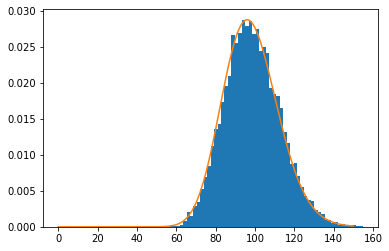

In [322]:
x = np.arange(0, 150, .05)

plt.hist(np.dot(var_sample_1_list,99), bins=60, density=True)
plt.plot(x, stats.chi2.pdf(x,98))
plt.show()

In [ ]:
x = np.arange(0, 3, .05)

plt.hist(var_sample_1_list, bins=50, density=True)
plt.plot(x, stats.norm(mean,std).pdf(x))
plt.show()

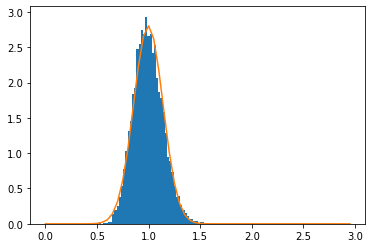

In [242]:
x = np.arange(0, 3, .05)

plt.hist(var_sample_1_list, bins=50, density=True)
plt.plot(x, stats.norm(mean,std).pdf(x))
plt.show()

In [190]:
var_sample_1_list

[0.9128026474554755,
 1.097460899564205,
 1.038760346199902,
 0.828009112028886,
 1.0053255529621234,
 1.0810392222587633,
 0.9572522338431217,
 0.9526956975181133,
 1.1775509146640242,
 0.9859598835508427,
 1.0848423748014662,
 0.8188289085333307,
 0.8981453325116466,
 1.1030241171733863,
 1.0131431867467293,
 0.8836950861298285,
 0.9141379911848387,
 1.0548841128184971,
 0.8322904169188252,
 1.0134947444853886,
 0.9136770181029733,
 0.981899120159114,
 1.067225018128087,
 1.1378431786564849,
 0.9723558767179616,
 1.0995562512475912,
 0.8874458834590723,
 1.0136806947936854,
 0.7346646281688074,
 0.9121848268641641,
 0.8345340785076898,
 1.0228574300187623,
 0.7901186711770056,
 1.0046325548731552,
 0.6626920257796294,
 1.0704766670577002,
 1.2773667778911433,
 0.8863538198443941,
 0.745419308979131,
 1.0885057246880356,
 0.9690266839623123,
 1.0011353186604806,
 1.2631402038179105,
 1.0729590977999581,
 1.055584365358197,
 0.9357005657093621,
 0.8439955767098005,
 1.0412531176760058,

In [186]:
np.random.seed(1)

pop_1 = np.random.normal(0, 1, size=pop_size)


In [188]:
var_sample_1

0.9128026474554755

In [164]:
?statistics.variance

In [162]:
?statistics.variance()

Object `statistics.variance()` not found.


In [158]:
sample_2

array([-0.47801054,  0.49523808,  1.05108001,  0.18864705,  0.67241312,
        0.81314223,  0.21275736,  1.89070911, -0.61194331, -2.33854005,
        1.60908246,  1.6337091 ,  0.44315633,  1.18666141,  1.23123414,
        2.0073888 ,  1.49911126,  0.23288059, -1.47306685,  0.38330843,
        1.48508054,  0.62673637,  1.36703946,  0.07039291,  0.8626835 ,
       -0.21533739, -0.62116744,  0.22306799, -1.97038056, -0.88960503,
        0.00277506,  0.64485815, -0.30502546, -0.49377679, -0.22541022,
       -0.83520523, -0.54069046,  0.21310106, -0.93104503, -0.5754467 ,
       -1.55160206,  0.3672874 , -0.54667525,  1.03007179,  0.10494271,
       -0.06516322,  0.10720384,  1.06288958,  0.16723545,  1.34717578,
       -0.18769597, -0.53592603, -0.71171612,  0.29574423, -0.22863234,
       -0.29975056,  0.6750333 , -0.27682509, -0.76021803, -0.78583785,
       -0.0716113 , -0.46291992, -0.47831664, -0.45240893,  0.51998894,
        1.51054471,  1.48991495,  1.40355746, -0.95276479,  0.34

In [157]:
sample_1

array([-0.37443832, -1.55484678, -1.10296955, -0.89930987,  1.176571  ,
        0.709015  ,  0.71742862,  1.53737981,  0.88869014, -1.46165786,
        1.34420128,  0.23385263,  0.53279741, -1.30152753,  0.76250647,
       -0.10170911, -0.82490452, -0.92477078,  0.06465569, -0.49776365,
       -1.01789911, -0.20664777, -0.60353328,  1.69364167,  0.25152454,
       -1.31889683,  1.925192  ,  1.18502612,  0.7040039 , -0.88660319,
        1.28530472, -0.53816245, -0.91291053, -0.83001099, -0.61175641,
        0.78799635, -1.17312222, -0.1624972 , -0.16943884,  1.56975551,
        1.04015274, -0.189063  ,  0.52485095, -0.33385612,  0.08429739,
        0.53035547,  0.97254597,  1.08109299, -0.54460106,  0.17516773,
        0.55893274, -0.89326159,  1.20942032,  0.98536031, -0.05269608,
        0.13790769, -0.62327661,  0.43849864, -0.01500073, -0.85505361,
       -1.30430751,  0.02245196, -0.68717193,  0.1186061 , -0.10298035,
        2.28724447, -1.30292402, -0.46316826,  0.53206401,  0.98

In [154]:
inx_2

array([4358, 5182, 9659, 3860,  924, 6265, 8584, 6275, 5635, 5633,  259,
        480, 3934, 1610, 6659, 9853, 6985, 6828, 7073, 5073, 5690,  350,
       5465, 5648, 1361, 3697, 3114,  911, 9734, 7276, 8474,  136, 2926,
       5221, 3233, 3484, 2281, 2847, 8085, 7227, 9675, 7310, 5112, 7484,
       7867, 4194, 2355, 3113, 6978, 2373, 4842,  694, 8847, 1505, 8795,
       4688, 4097, 8814, 2512, 1027, 1698,  967, 7823,   33,  905, 9593,
       8468, 5547, 8106, 7279, 8564, 2154, 6591, 7832, 3270, 9080, 2578,
       9724, 6353, 4851,  885, 1808, 4235, 6267, 5439, 9008, 6618, 3800,
       8513, 5065, 8196, 3451, 7083, 1321, 5569, 8902, 5711, 6625, 9310,
       6422])

In [151]:
inx_1

array([ 263, 9769, 1648, 8624, 3214, 5965, 1309, 1538, 3515, 6118, 6744,
       8993, 8707, 8243, 3030, 1864, 2844, 6244, 2247, 3358, 5502, 7923,
       9828, 6351, 8501, 2362, 9990, 7301, 5819, 6552, 9506, 9467, 5187,
        846,    1, 7109, 8783, 2870, 7482, 1732, 2508, 8577, 2715, 5496,
       1743,   29, 4250, 1300, 9895,  982, 2568, 8197, 9917, 7805, 7385,
       3279, 6692, 8240, 2304, 3785, 3236, 3798, 9057, 4872, 4081, 7205,
       9672, 5286, 4636, 4548, 4532, 4242,  958, 2988, 3704, 5086, 3900,
       3063,  104, 8422, 1820, 6507, 3256, 8843, 6094, 6868, 5695, 7826,
       4084, 7891, 8734, 1955,  275, 1711, 5537, 1403, 4078, 2282, 8867,
       2869])

In [147]:
np.set

In [149]:
inx_2

array([3748, 3330, 3137, 8682, 5345, 3991, 5024, 1516, 6447, 3197, 1456,
       7338, 7479, 2089, 7034, 4633, 7978, 5133, 5336,  579, 5394, 5382,
       1724, 8167, 1414, 5067, 7663, 3483, 3457, 5949, 8435, 5041, 3103,
       5149, 2618, 5777, 3939, 1570, 1017, 5612, 3200, 7942, 3841,  435,
       6705, 5775,  232, 3392,  738, 3440, 7210, 8671, 6505, 5278,  172,
       7459, 5553, 4248, 1379,  780, 7567, 9225, 4417, 6595, 6017, 2388,
       1070,  907,  154, 5647, 6287, 2764, 4733, 8164, 3554, 5873, 6774,
       4931, 5805, 7214, 2543, 1692, 8734,  403, 6447, 9101, 2183, 3932,
       9472, 6477,  105, 4897, 1074, 4984,   10, 9747, 7430, 4979,  185,
       5387])

In [148]:
inx_1

array([2757, 7827, 1281, 3468,  907, 7258, 3767, 3353, 4871,  926, 8494,
       7608, 8405, 3924, 8204, 4678, 9197, 9864, 9847,   45, 1410,  528,
       9955, 2145, 5373, 2811, 1724, 5927, 6238, 5684, 5306, 1116, 9115,
        643,  118, 6266, 2333, 7934, 2625, 1006, 9479, 7739, 7316, 2022,
       1369, 1070, 5145, 1506, 3431, 5730, 2321, 1083,  624, 7510, 7365,
       6792, 3615, 3922, 2488, 7118,   75, 1977, 6778, 3508, 8509, 1109,
       6059, 8220, 6292,  181, 9999, 7571, 6152, 3929, 5222, 9820, 4052,
       6625, 2766, 6672, 4037, 9755, 2817, 9936, 3030, 5268, 2358, 4111,
         45, 6154, 5290, 2556, 6312, 2604, 4770, 2694, 1249, 9855, 4472,
       2854])

In [138]:
?np.random.randint

In [144]:
pop_2

array([-1.15337049, -2.96215811, -0.5094415 , ...,  1.70724445,
       -0.37011846,  0.05921137])

In [143]:
pop_1

array([-1.15168911,  1.02061177,  0.5157553 , ..., -0.72567567,
        1.11401565,  0.04318798])

In [146]:
inx

array([ 109, 4504, 3554,  226, 1326, 4408, 2125, 9417, 6939, 8514, 4271,
       8607, 1106, 7966, 7781, 9214, 7886, 7878, 3549, 4120,  798, 9066,
       2633, 2471, 5087, 5908, 2176, 5660, 7820, 7785, 5533, 5788, 5931,
       5212, 7503, 1172, 3316, 5036,  735, 8829, 6731, 7296, 6625, 7059,
       8679, 6358, 9544, 1812, 2648, 8549, 3520, 4818,   24, 8326, 5340,
       9623, 5008, 1640, 7037, 1848, 5700, 5850,  596,   71, 7387, 9357,
       4746,  906, 2052, 3771, 1628, 5504,  217, 7712, 3105, 6493, 1908,
       4406,  878, 2573, 4041, 2931, 1922, 1027, 7645,  760,  307, 1068,
       8775, 5409, 6738, 8392, 7540, 4170, 7784, 4937, 9254, 4596, 7708,
       9938])

In [142]:
inx

array([6957, 8369, 3796, 7636, 2344,  643, 8800, 5538, 4120, 1536, 7272,
       8422, 7943, 1315, 1936, 1805, 7692, 1869, 2778, 8552, 9948, 6917,
       2642, 7142, 3222,  153, 4604, 7510, 3679, 7586, 7641, 9706, 9402,
        878, 3012, 9463, 5519, 3387, 5261, 9530, 2875, 4594, 6330,  540,
       4889, 7130, 5422, 4621, 9634, 4562, 4579, 1006, 3875, 1274, 2552,
       5595, 1157, 9608,  996, 4514, 7769, 3401, 3811, 4719, 5787, 7046,
       2776, 8465, 5920, 7980, 7024, 6856, 6652, 2047, 8594, 7533,  768,
        681, 2200, 1515, 5384, 5144,  406, 3025,  286, 1961, 7368, 7201,
       5706, 9174, 6835, 1234, 1988, 4229, 3878, 4788, 4427, 8080, 3596,
       9920])

No handles with labels found to put in legend.


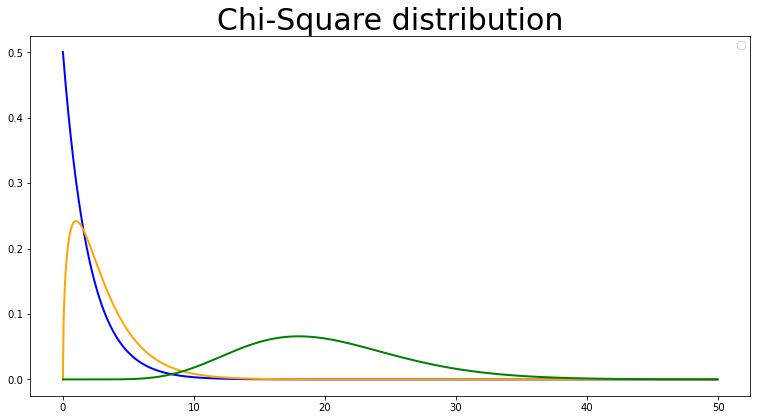

In [30]:
fig = plt.figure(figsize=(10,5))
ax_1 = fig.add_axes([0,0,1,1])

x = np.arange(0, 50, .05)

ax_1.plot(x, stats.chi2.pdf(x, df=2), color='blue', lw=2)

ax_1.plot(x, stats.chi2.pdf(x, df=3), color='orange', lw=2)

ax_1.plot(x, stats.chi2.pdf(x, df=20), color='green', lw=2)


ax_1.set_title("Chi-Square distribution", fontsize=30)


plt.legend()
plt.show()

In [9]:
ax_1.plot(x, stats.f.pdf(x, 20, 5), color='blue', lw=2)


In [8]:
?stats.f.pdf

No handles with labels found to put in legend.


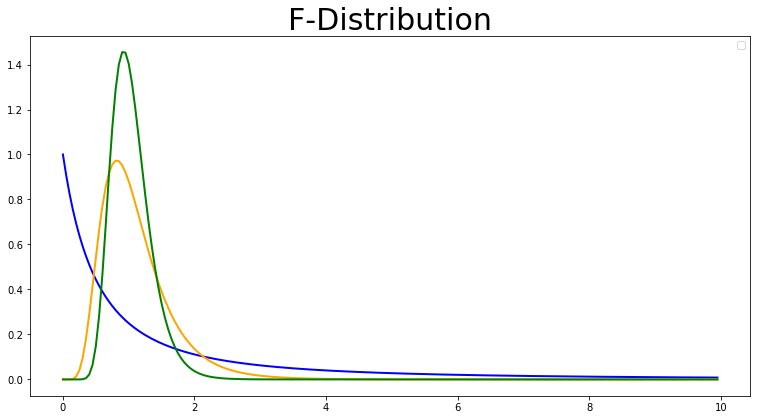

In [16]:
fig = plt.figure(figsize=(10,5))
ax_1 = fig.add_axes([0,0,1,1])

x = np.arange(0, 10, .05)
ax_1.plot(x, stats.f.pdf(x, 2, 2), color='blue', lw=2)
ax_1.plot(x, stats.f.pdf(x, 20, 20), color='orange', lw=2)
ax_1.plot(x, stats.f.pdf(x, 50, 50), color='green', lw=2)

ax_1.set_title("F-Distribution", fontsize=30)

plt.legend()
plt.show()

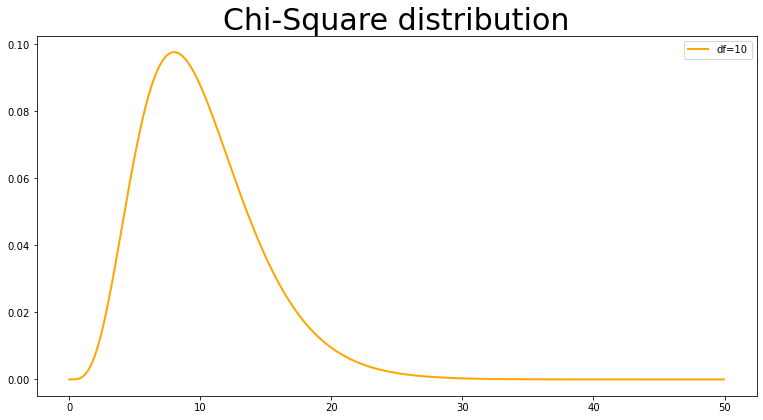

In [6]:
fig = plt.figure(figsize=(10,5))
ax_1 = fig.add_axes([0,0,1,1])

x = np.arange(0, 50, .05)
#ax_1.plot(x, stats.chi2.pdf(x, df=3), color='blue', lw=2, label="df=3")
ax_1.plot(x, stats.chi2.pdf(x, df=10), color='orange', lw=2, label="df=10")
#ax_1.plot(x, stats.chi2.pdf(x, df=20), color='green', lw=2, label="df=20")

ax_1.set_title("Chi-Square distribution", fontsize=30)

plt.legend()
plt.show()

In [ ]:
stats.chi

In [17]:
def chi_square_dist(df):
    z_dist_list = []
    for i in range(df):
        z_squared = np.square(np.random.normal(0,1,8000))
        z_dist_list.append(z_squared)
    
    return np.sum(np.array(z_dist_list), axis=0) 

#This is an alternative of getting chisquare distribution.
#np.random.chisquare(df,size)

In [20]:
np.square(np.random.normal(0,1,8000))

array([1.65646435, 1.71733742, 0.65233425, ..., 0.75808073, 0.01327432,
       0.76497456])

In [21]:
np.square(np.random.normal(0,1,8000))

array([1.08735599e-03, 2.82904455e-01, 7.28517851e-01, ...,
       9.22859940e-02, 1.16653684e+00, 1.62624515e+00])

In [23]:
z_dist_list = []
for i in range(2):
    z_squared = np.square(np.random.normal(0,1,8000))
    z_dist_list.append(z_squared)

In [24]:
z_dist_list

[array([0.30047475, 0.45631467, 1.1181979 , ..., 2.66604628, 0.03606337,
        0.4299477 ]),
 array([0.00975816, 2.32508878, 0.07752642, ..., 0.45534214, 0.65288344,
        4.24367108])]

In [25]:
np.array(z_dist_list)

array([[0.30047475, 0.45631467, 1.1181979 , ..., 2.66604628, 0.03606337,
        0.4299477 ],
       [0.00975816, 2.32508878, 0.07752642, ..., 0.45534214, 0.65288344,
        4.24367108]])

In [26]:
np.sum(np.array(z_dist_list), axis=0) 

array([0.31023292, 2.78140345, 1.19572432, ..., 3.12138842, 0.68894681,
       4.67361879])

In [18]:
chi_square_dist(2)

array([2.07269342, 2.39452755, 6.29987261, ..., 2.40409495, 1.52901078,
       1.31498848])